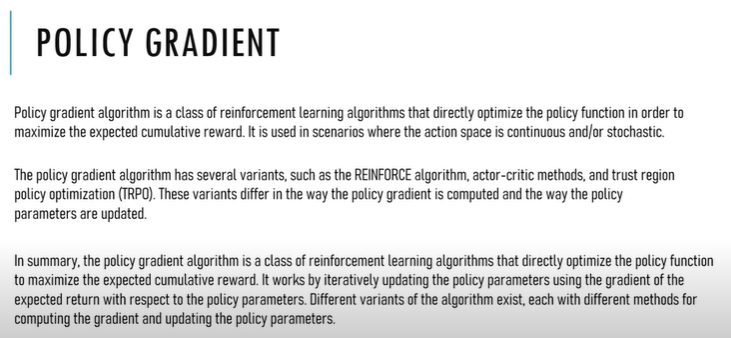

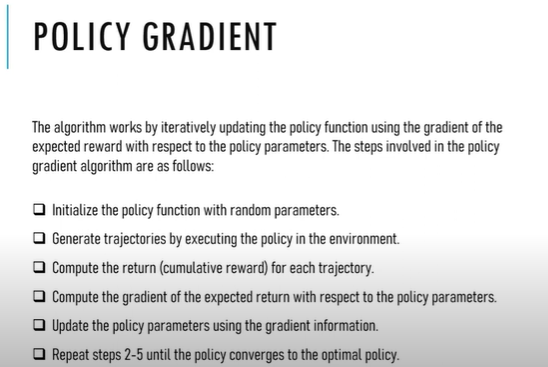

In [1]:
import gym
import tensorflow as tf
import numpy as np

In [ ]:
env = gym.make('MountainCar-v0')

input_size = env.observation_space.shape[0]
hidden_size = 32
output_size = env.action_space.n
learning_rate =.01

In [4]:
inputs = tf.keras.layers.Input(shape=(input_size,))
x = tf.keras.layers.Dense(hidden_size, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(output_size, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [5]:
def policy_grad(state, action, reward):
    with tf.GradientTape() as tape:
        logits = model(tf.convert_to_tensor(state, dtype=tf.float32))
        action_prob = tf.nn.softmax(logits)
        
        log_prob = tf.math.log(action_prob[0, action])
        
        loss = -log_prob * reward
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [6]:
episodes = 10
discount_factor = 0.99

In [8]:
for episode in range(episodes):
    state = env.reset()[0].reshape(1, input_size)
    episode_reward = 0
    
    while True:
        env.render()
        logits = model(tf.convert_to_tensor(state, dtype=tf.float32))
        action_prob = tf.nn.softmax(logits)
        
        action = np.random.choice(output_size, p=action_prob.numpy()[0])
        next_state, reward, done, _ = env.step(action)
        
        episode_reward += reward
        discounted_reward = reward + discount_factor * episode_reward
        
        policy_grad(state, action, discounted_reward)
        
        if done:
            break
    print(f"Episode {episode+1}: Reward = {episode_reward}")
    
env.close()

d:\a27_YEARS_OLD\rainforcement_learning\venv\Lib\site-packages\gym\envs\classic_control\mountain_car.py:171: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(


AttributeError: module 'numpy' has no attribute 'bool8'